In [11]:
import sys
# Add the parent directory to the system path
sys.path.insert(1, r"C:\Users\sk88\Documents\Python")

from Function_files.addresses import Init_Directories
import Function_files.data_functions as dat
from Function_files.plotting_functions import plot_scope
from Function_files.filter_functions import smooth_data 
from Function_files.math_functions import average_arrays, zoom
from Function_files.fitting_functions import fit_gls, peak_find, pseudo_voigt, lorentzian, fit_lorentz

import os
import numpy as np
import matplotlib.pyplot as mp

dirs = Init_Directories()
path = dirs.dropbox + "Paderborn EIT"
exts = '.csv'

di = dict(

time = 0,
scan = 1,
probe = 2

)

In [2]:
# populate folder and file lists
folder_list, file_list = dat.dir_interogate(path, extensions=exts)
# create dictionary for indexing folders and files
folder_index = dat.make_index_dict(folder_list)
file_index = [dat.make_index_dict(file_sub_list) for file_sub_list in file_list]
# lists of the data paths and metadata (text) paths
data_path_list = dat.search_paths(folder_list, file_list, exts)
metadata_path_list = dat.search_paths(folder_list, file_list, exts)
# extract the relevant data from the files
EIT_10MHz_sets = [dat.open_csv(os.path.join(path, data_path)) for data_path in data_path_list[folder_index['10MHz Scan']]]
EIT_window_sets = [dat.open_csv(os.path.join(path, data_path)) for data_path in data_path_list[folder_index['EIT window']]]
Other_sets = [dat.open_csv(os.path.join(path, data_path)) for data_path in data_path_list[folder_index['Other']]]

In [3]:
# convert timebase to frequency and find N points between scans
N = []
for excel in EIT_10MHz_sets:
    a, b = zoom(excel[:,di['time']], (-0.5, 0.5))
    N.append(b-a)

# convert to frequency
dv = [10E6/(2*n) for n in N]
frequency = [excel[:,di['time']] * v for excel, v in zip(EIT_10MHz_sets, dv)]
# smooth data and fidn peaks
smoothed = [smooth_data(excel[:,di['scan']]) for excel in EIT_10MHz_sets]
peaks = [peak_find(smooth, freq, top_tol=0.75, dist=n) for smooth, freq, n in zip(smoothed, frequency, N)]

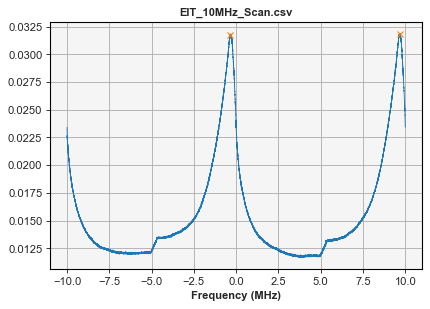

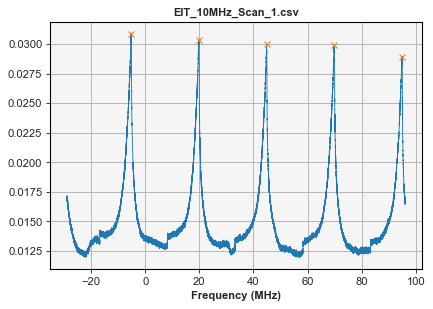

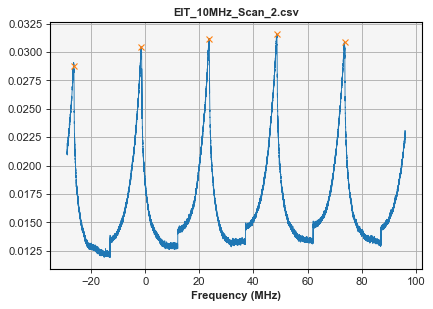

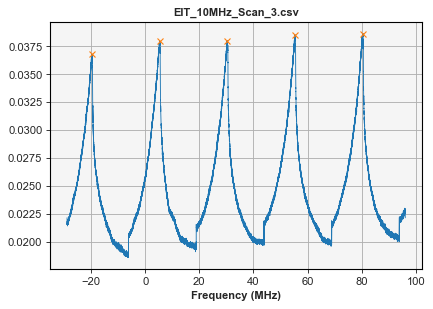

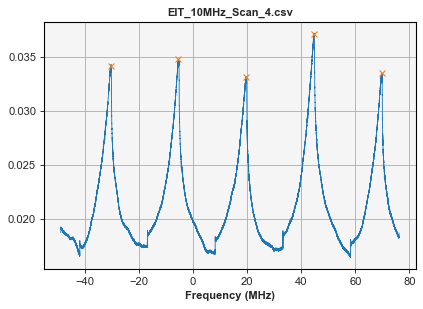

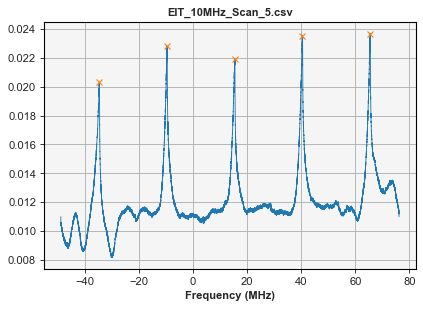

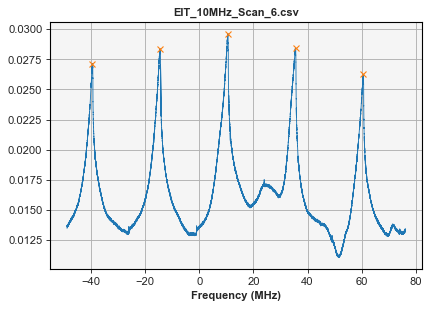

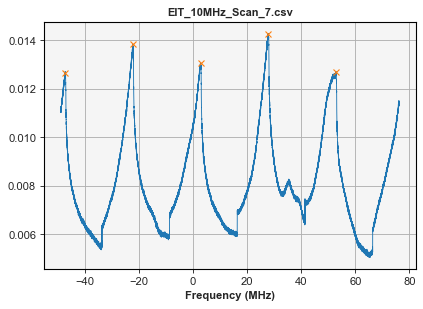

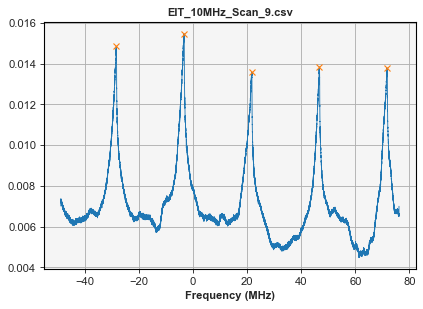

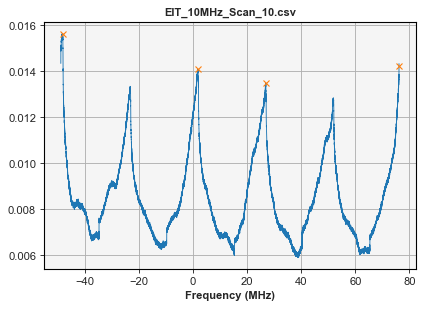

In [12]:
# plot the smoothed data with peaks
index = 0
for freq, smooth, peak in zip(frequency, smoothed, peaks):

    fig, ax = mp.subplots()
    ax.plot(freq, smooth)
    ax.plot(freq[peak], smooth[peak], 'x')
    ax.set_title(list(file_index[folder_index['10MHz Scan']])[index])
    ax.set(xlabel='Frequency (MHz)')
    index += 1

In [4]:
# isolate the individual peaks and pad around these points for fitting to a single peak
window_idx = []
for peak_set, n in zip(peaks, N):
    temp = []
    for peak in peak_set:
        start = int(peak - n/2)
        stop = int(peak + n/2)
        if start < 0:
            start = 0
        if stop > 1000000:
            stop = -1
        temp.append(np.array([start, stop]))
    window_idx.append(temp)

In [ ]:
# plot the individual peaks in each dataset
index = 0
for freq, smooth, peak, indexes in zip(frequency, smoothed, peaks, window_idx):
    for place, idx in enumerate(indexes):
        fig, ax = mp.subplots()
        ax.plot(freq[idx[0]:idx[1]], smooth[idx[0]:idx[1]])
        ax.plot(freq[peak[place]], smooth[peak[place]], 'x')
        ax.set_title(list(file_index[folder_index['10MHz Scan']])[index])
        ax.set(xlabel='Frequency (MHz)')
    index += 1

In [5]:
# fit to the peaks in each plot
index = 0
l_fitted = []
vp_fitted = []
for freq, smooth, peak, indexes in zip(frequency, smoothed, peaks, window_idx):
    l_temp = []
    vp_temp = []
    for place, idx in enumerate(indexes):
        
        top = smooth[peak[place]]
        low = min(smooth[idx[0]:idx[1]])
        mid = freq[peak[place]]
        width = (freq[idx[1]]-freq[idx[0]])/2

        try:
            l_fit = fit_lorentz(freq[idx[0]:idx[1]], smooth[idx[0]:idx[1]], (top, low, mid, width))
            vp_fit = fit_gls(freq[idx[0]:idx[1]], smooth[idx[0]:idx[1]], (low, top, mid, width, top, mid, width, 0.2))
            l_temp.append(l_fit)
            vp_temp.append(vp_fit)
        except:
            l_temp.append([])
            vp_temp.append([])
    l_fitted.append(l_temp)
    vp_fitted.append(vp_temp)

fit fail


C:\Users\sk88\AppData\Local\Temp\ipykernel_20404\470637498.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


fit fail
fit fail


C:\Users\sk88\AppData\Local\Temp\ipykernel_20404\470637498.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = mp.subplots()


fit fail
fit fail
fit fail
fit fail
fit fail
fit fail
fit fail
fit fail


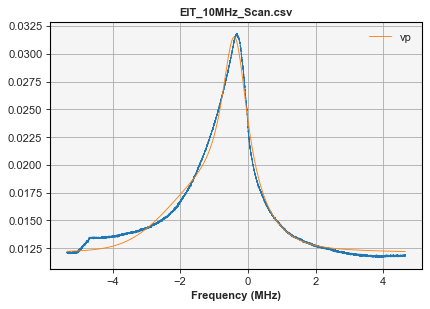

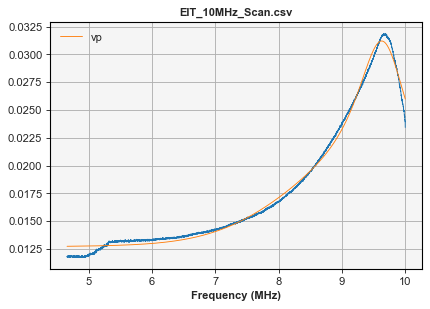

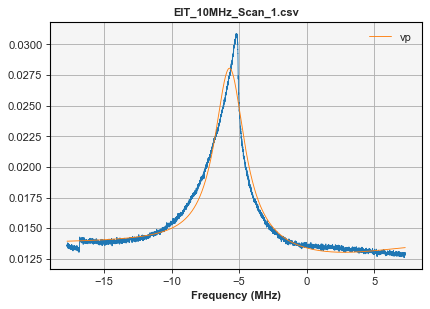

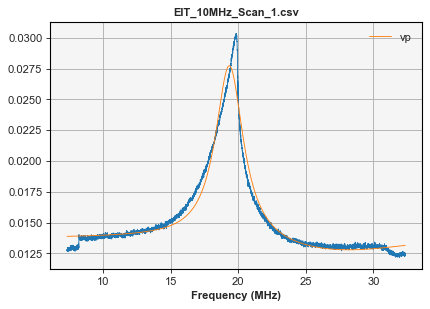

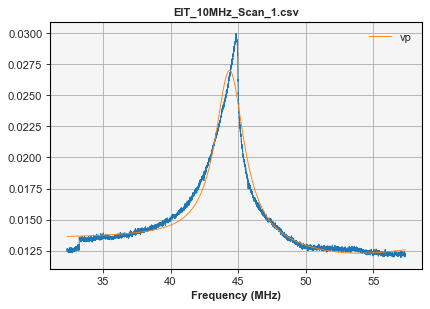

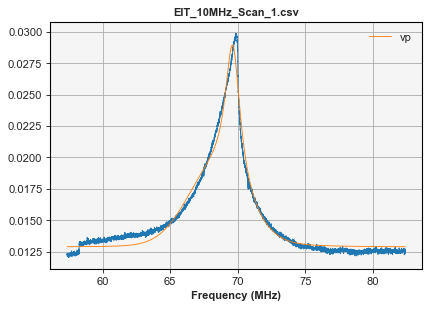

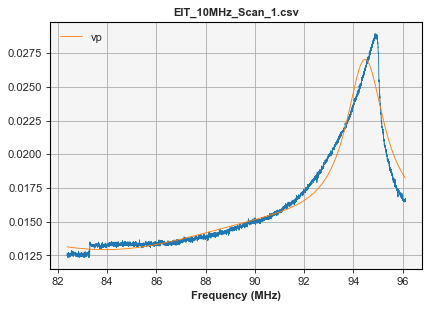

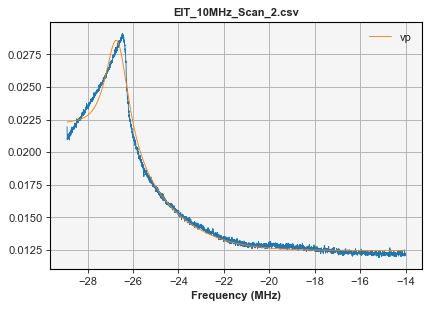

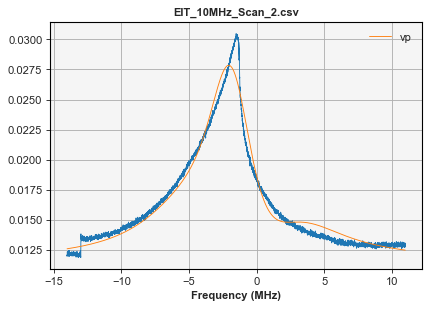

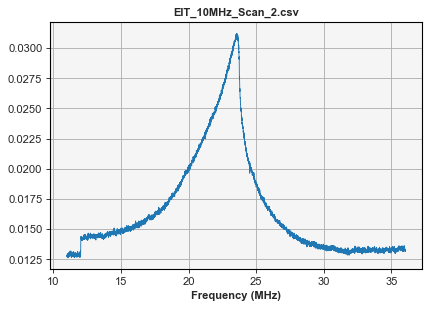

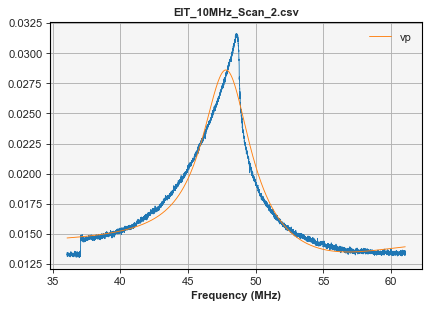

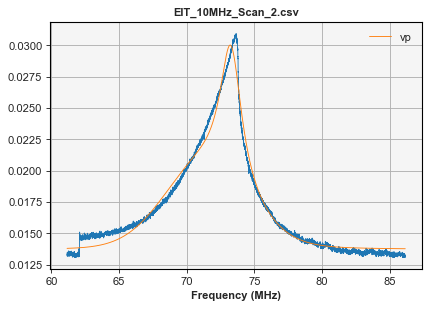

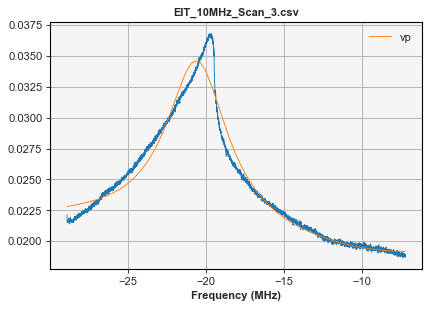

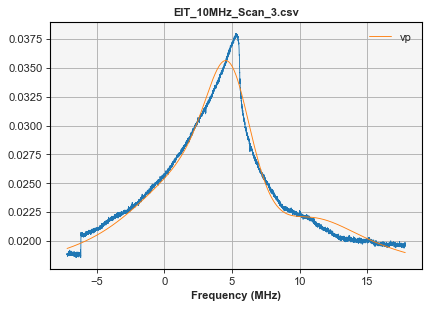

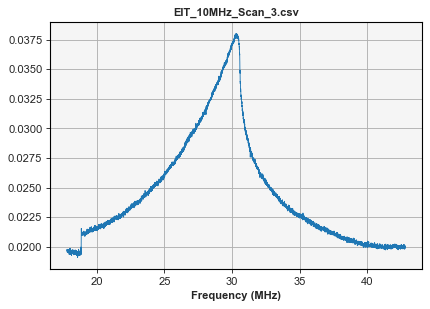

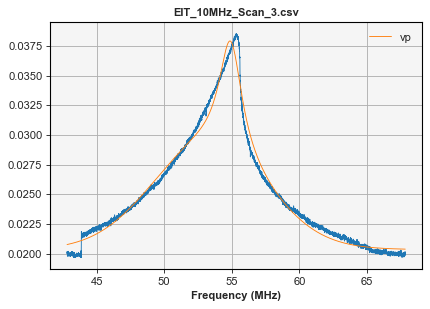

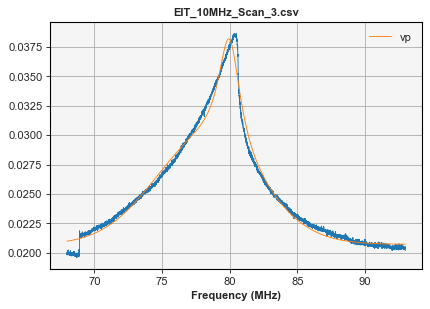

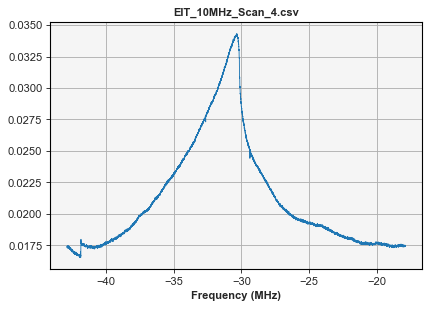

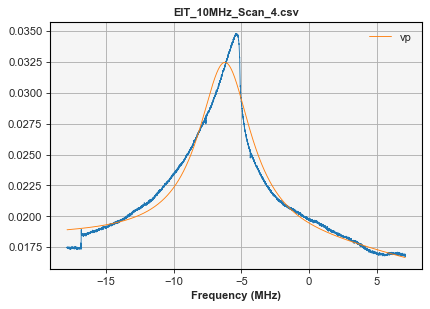

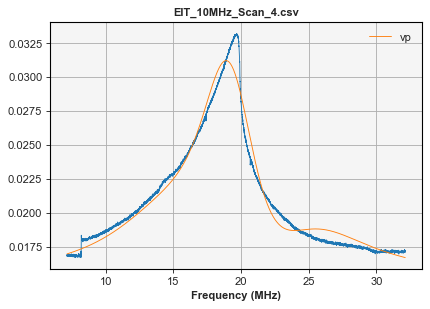

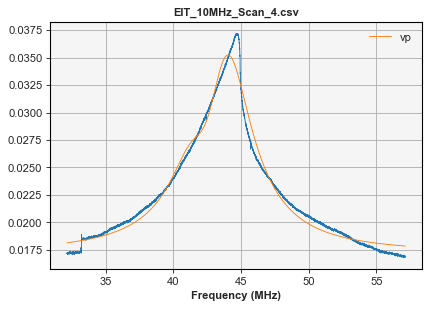

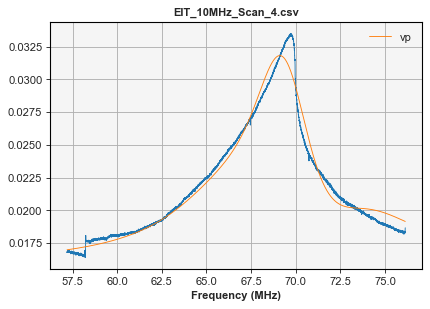

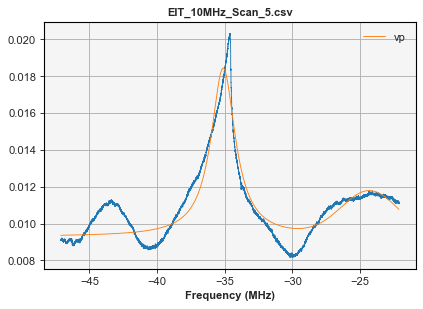

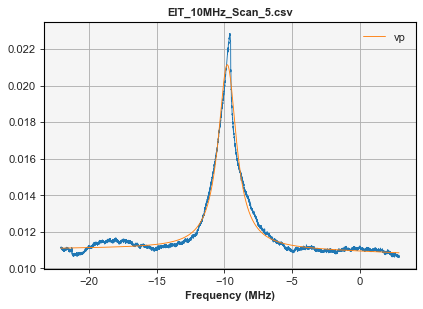

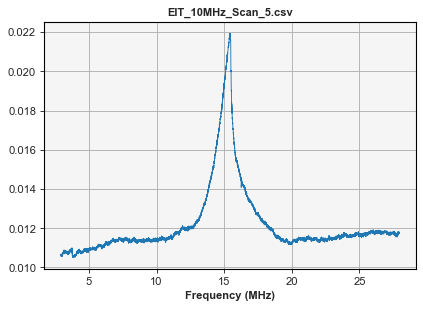

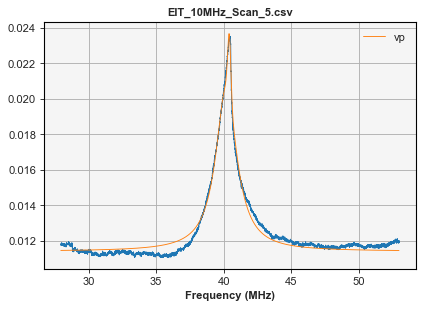

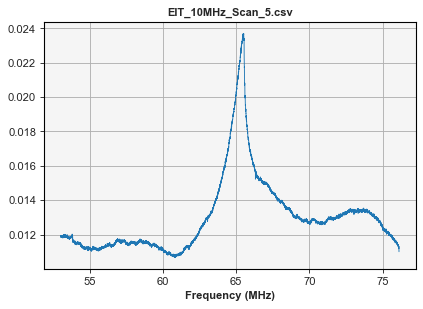

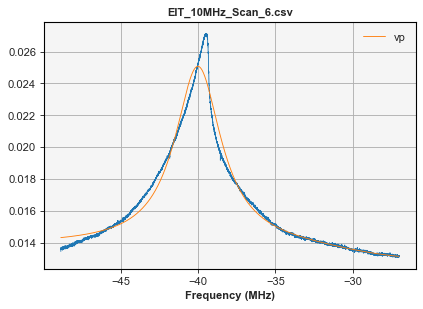

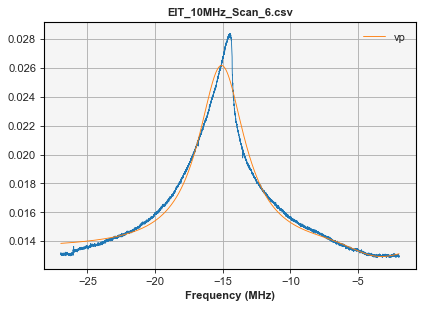

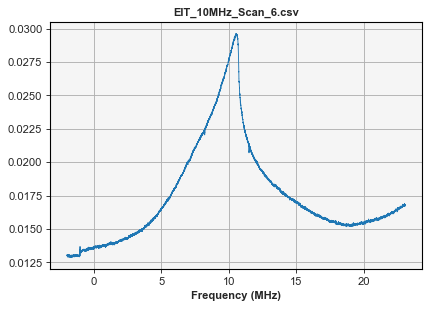

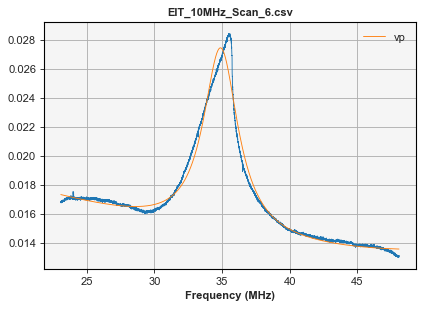

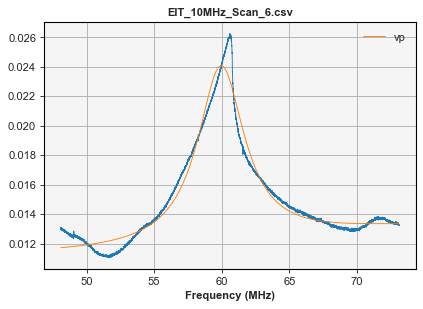

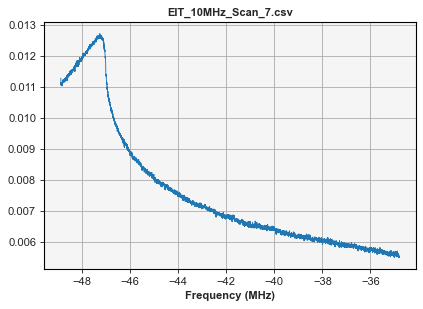

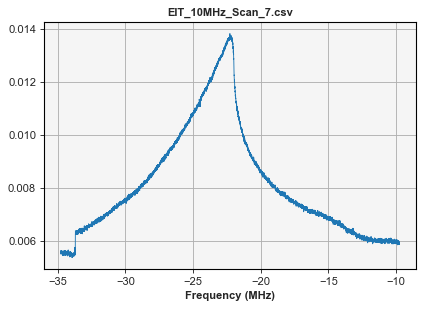

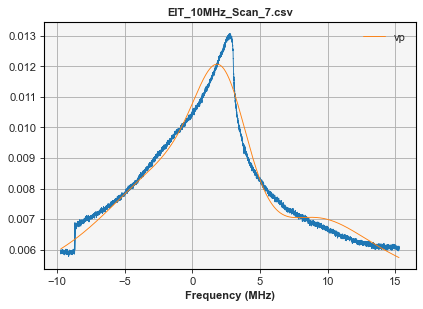

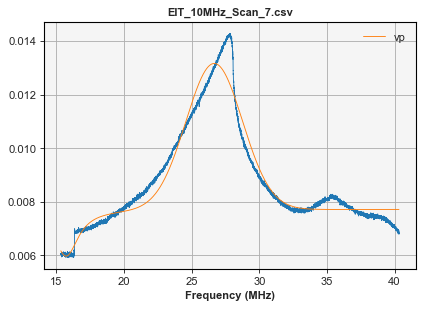

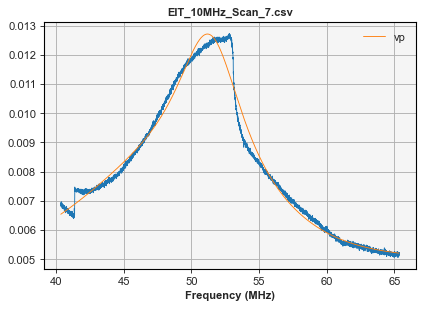

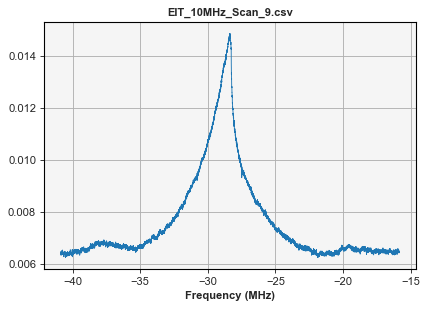

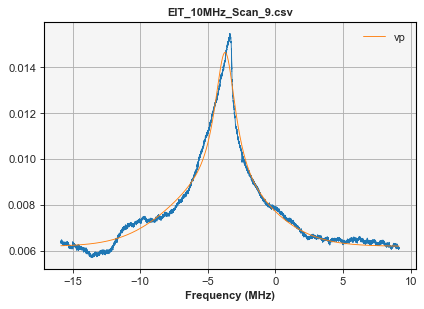

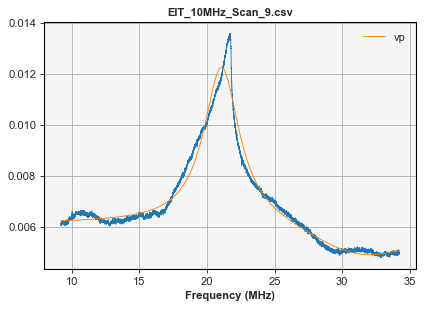

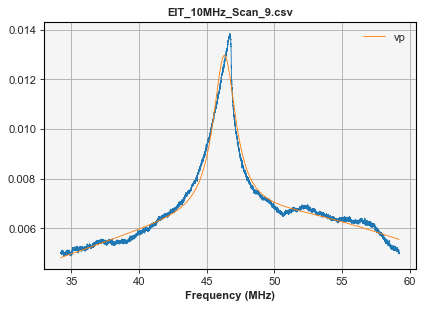

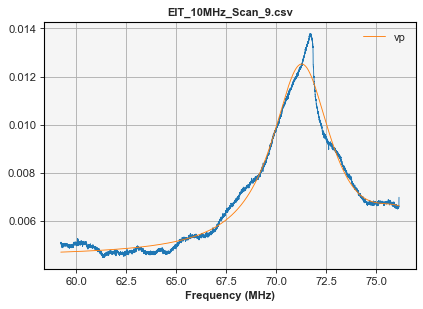

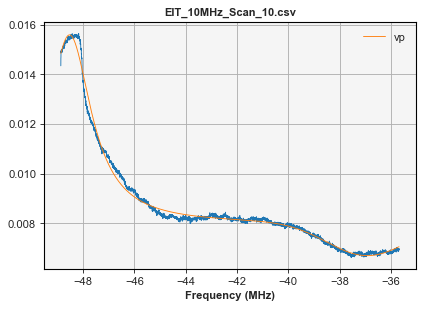

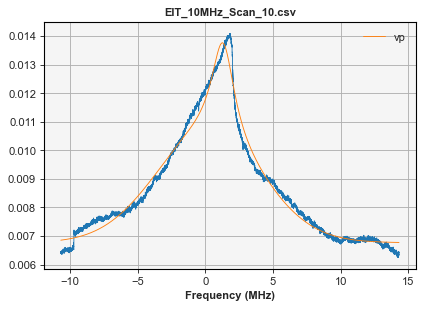

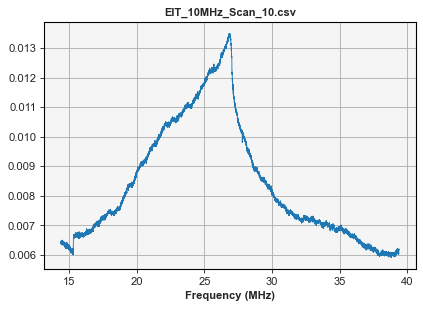

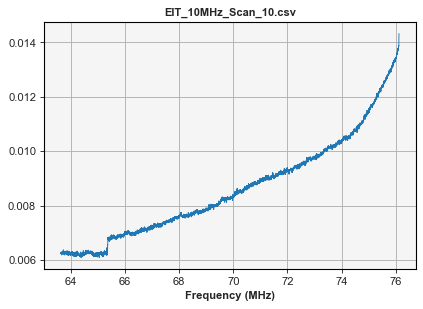

In [9]:
# plot the fitted peaks in each dataset
index = 0
for freq, smooth, peak, indexes, vp_fit in zip(frequency, smoothed, peaks, window_idx, vp_fitted):
    for idx, vp_params in zip(indexes, vp_fit):

        fig, ax = mp.subplots()
        ax.plot(freq[idx[0]:idx[1]], smooth[idx[0]:idx[1]])
        try:
            ax.plot(freq[idx[0]:idx[1]], pseudo_voigt(freq[idx[0]:idx[1]], *vp_params[0]), label='vp')
        except:
            print('fit fail')
        ax.set_title(list(file_index[folder_index['10MHz Scan']])[index])
        ax.set(xlabel='Frequency (MHz)')
        ax.legend()
    index += 1

fit_fail
fit_fail


C:\Users\sk88\AppData\Local\Temp\ipykernel_20404\512718452.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


fit_fail


C:\Users\sk88\AppData\Local\Temp\ipykernel_20404\512718452.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = mp.subplots()


fit_fail
fit_fail
fit_fail
fit_fail
fit_fail
fit_fail
fit_fail
fit_fail


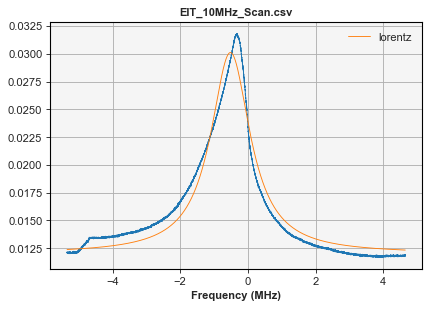

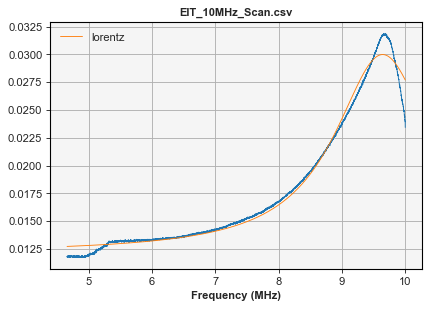

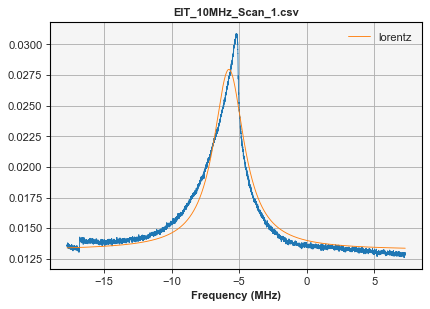

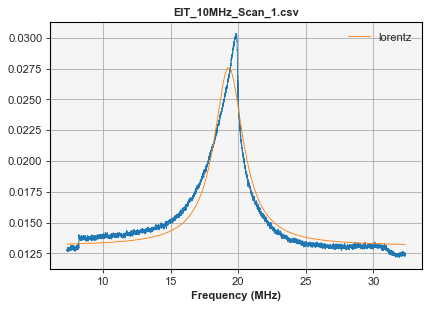

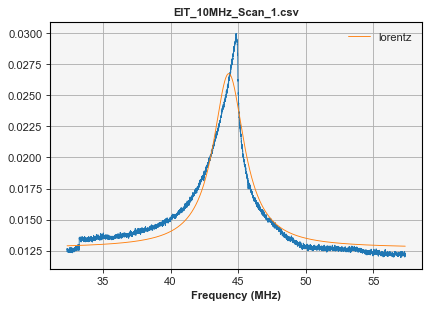

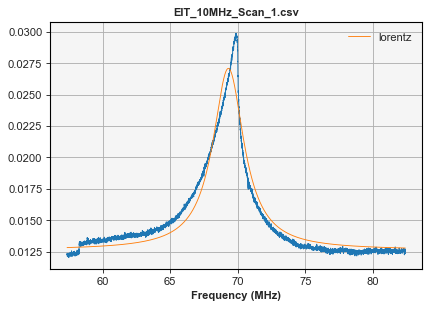

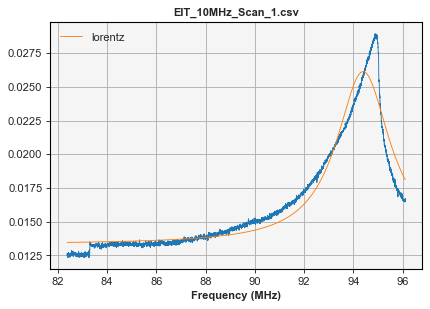

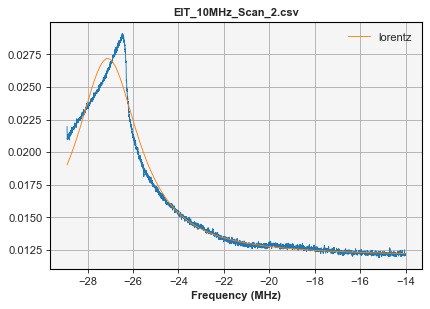

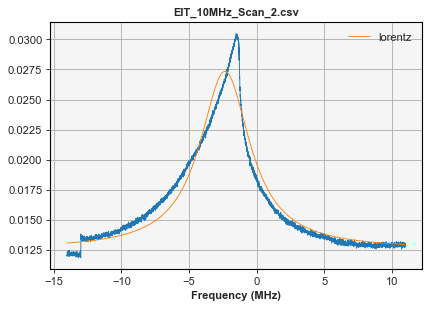

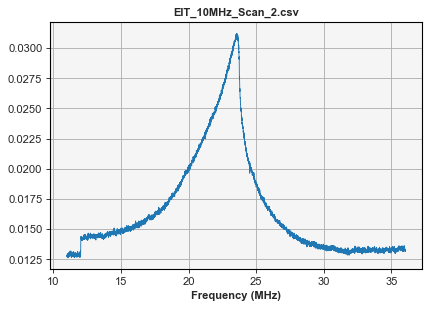

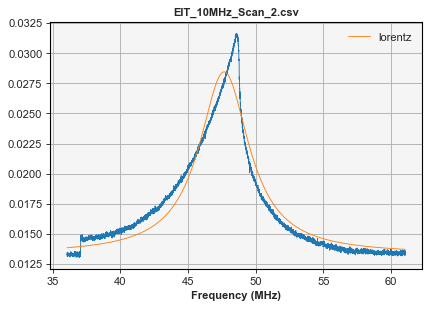

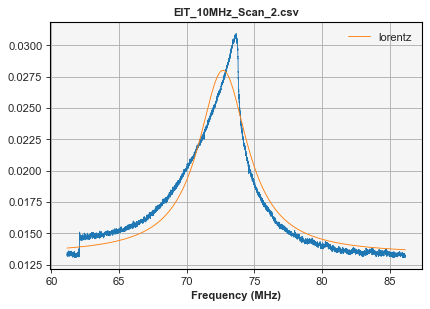

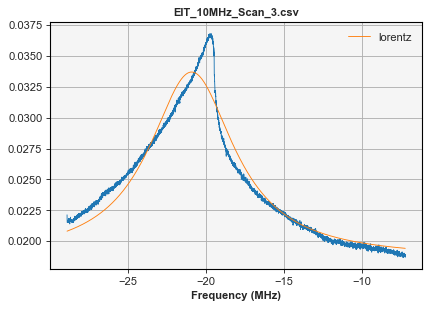

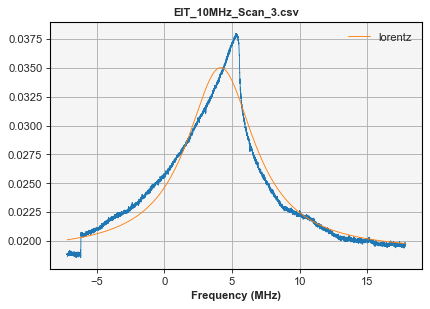

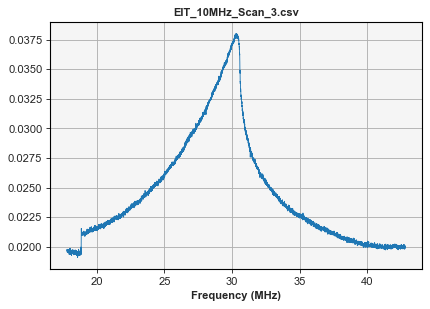

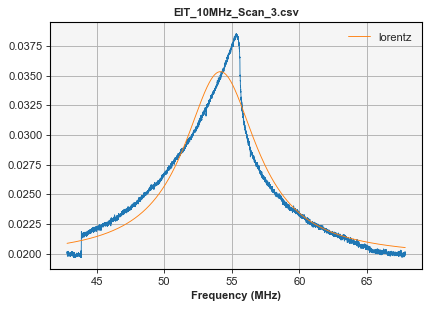

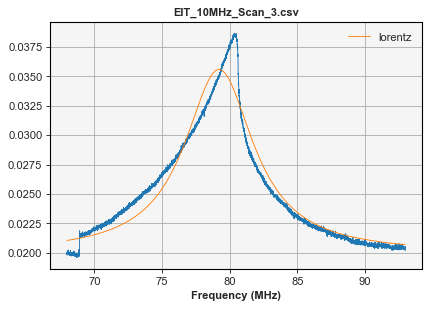

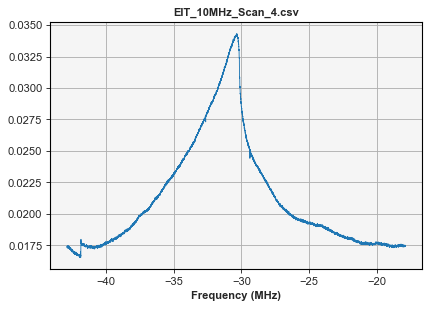

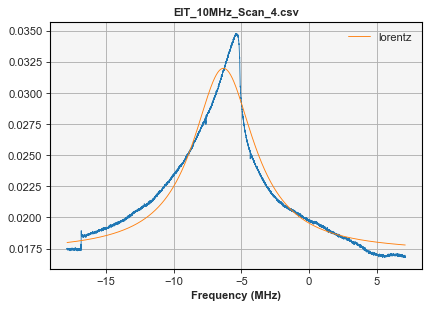

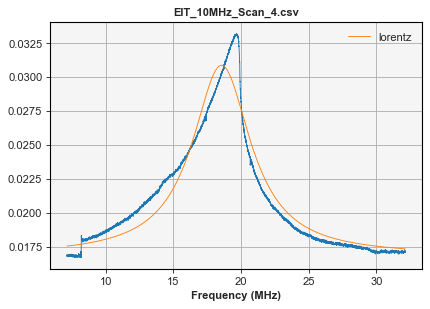

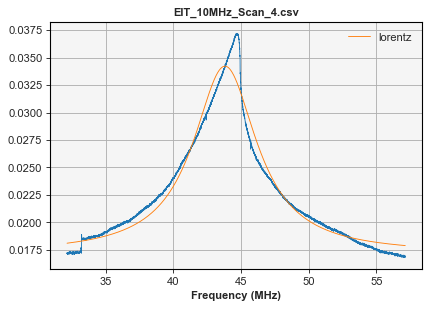

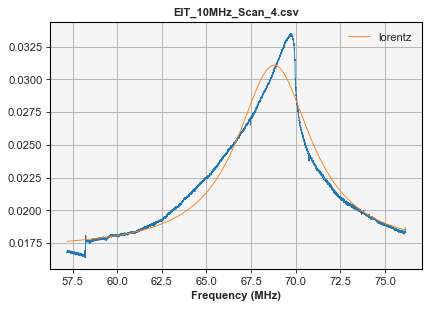

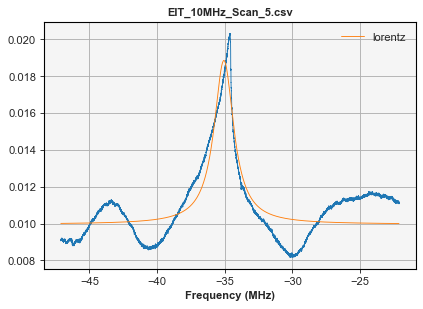

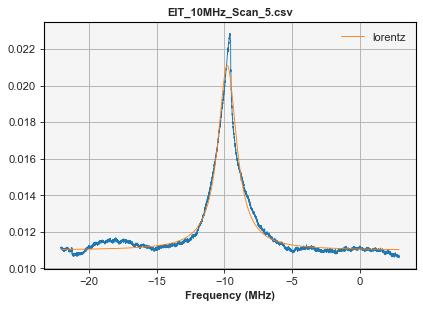

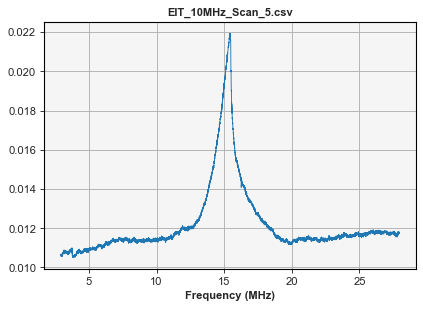

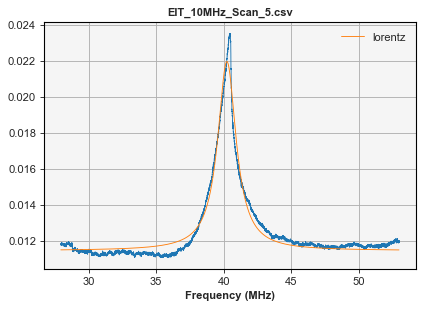

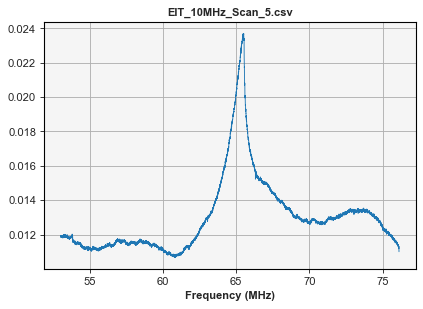

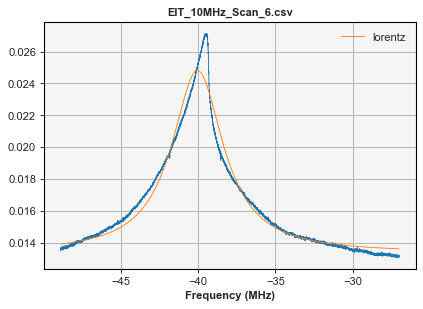

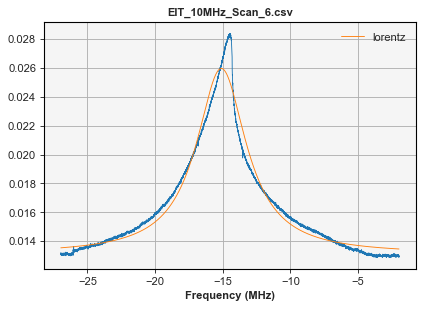

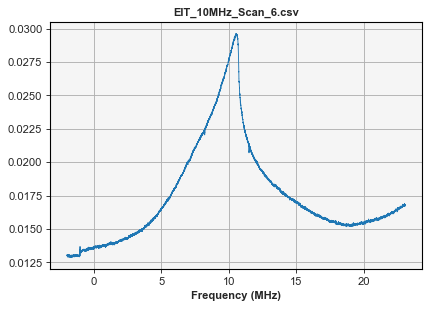

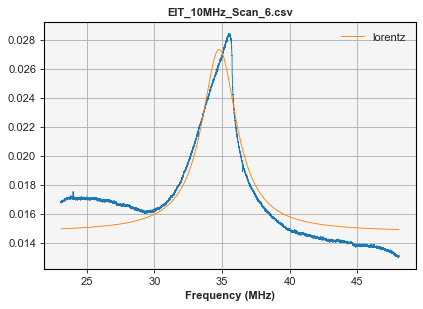

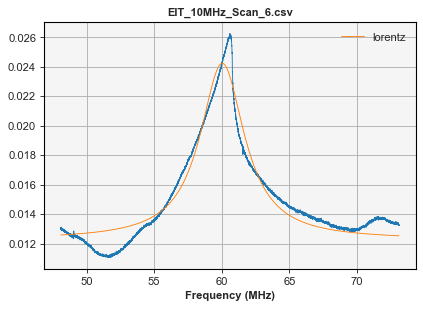

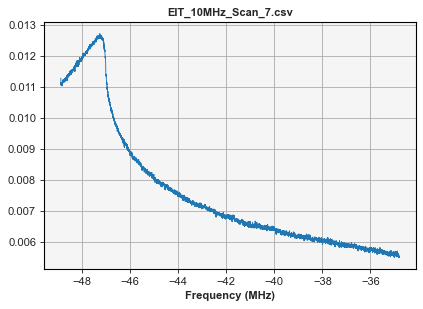

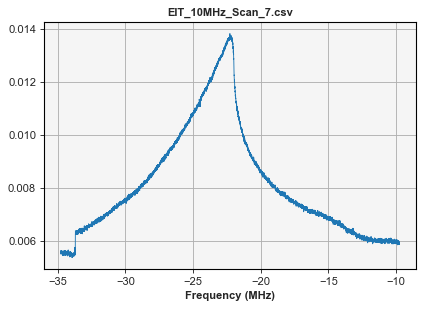

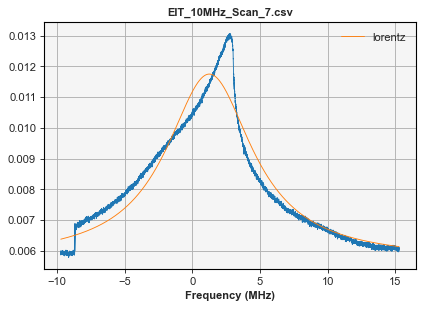

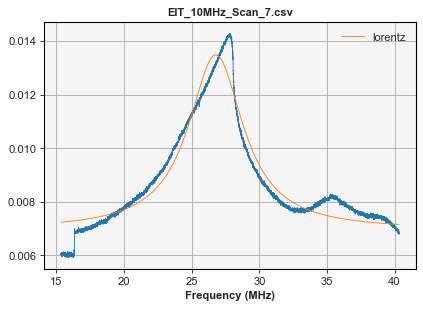

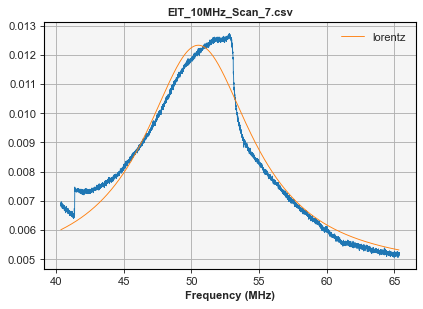

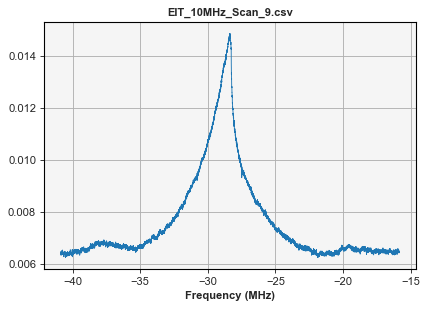

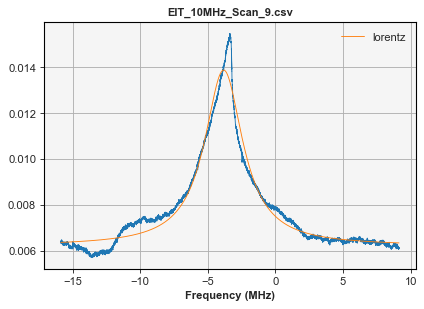

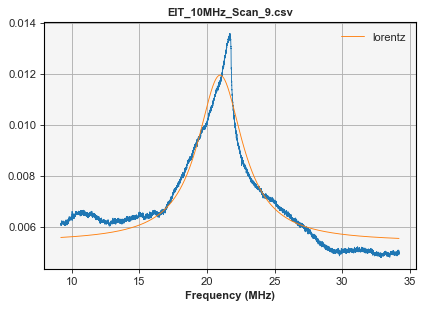

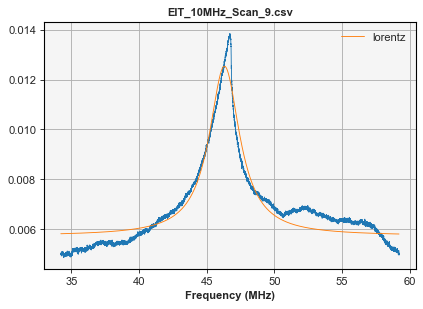

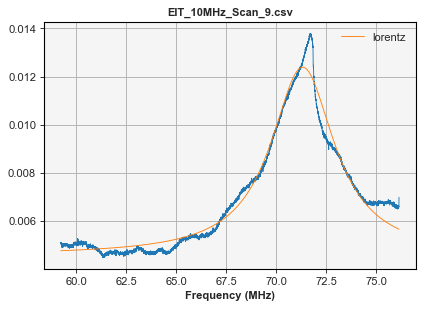

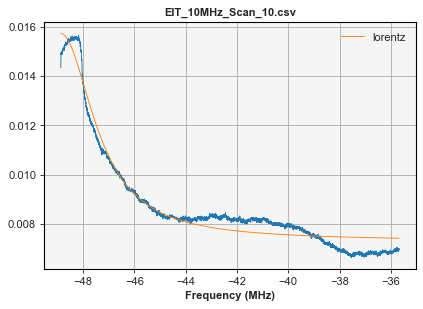

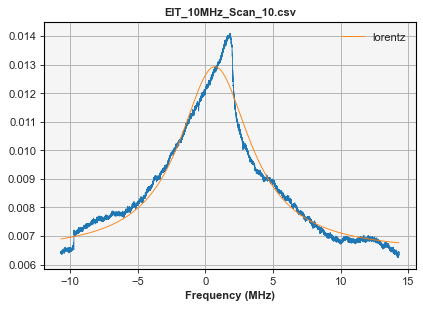

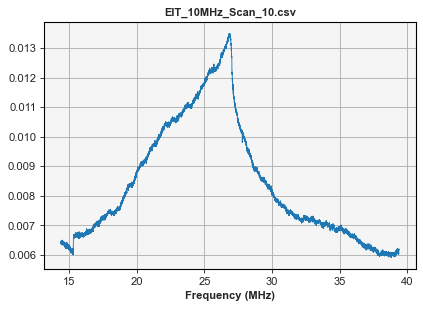

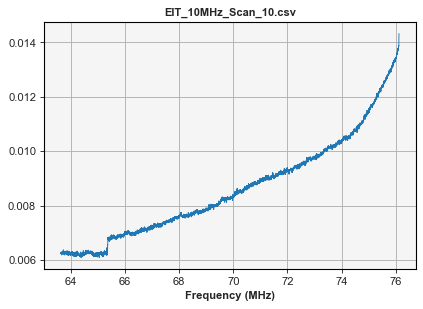

In [10]:
# plot the fitted peaks in each dataset
index = 0
for freq, smooth, peak, indexes, l_fit in zip(frequency, smoothed, peaks, window_idx, l_fitted):
    for idx, l_params in zip(indexes, l_fit):

        fig, ax = mp.subplots()
        ax.plot(freq[idx[0]:idx[1]], smooth[idx[0]:idx[1]])
        try:
            ax.plot(freq[idx[0]:idx[1]], lorentzian(freq[idx[0]:idx[1]], *l_params[0]), label='lorentz')
        except:
            print('fit_fail')
        ax.set_title(list(file_index[folder_index['10MHz Scan']])[index])
        ax.set(xlabel='Frequency (MHz)')
        ax.legend()
    index += 1

In [ ]:
centre = EIT_10MHz_sets[0][peaks,di['time']] * dv/2
g_amp = 0.001
l_amp = 0.035
y_0 = 0.01 *dv/2
x_0g = -0.032376 * dv/2
x_0l = -0.032376 * dv/2
sigma = 0.01
gamma = 0.25
eta = 0.1

vp_p = (y_0, g_amp, x_0g, sigma, l_amp, x_0l, gamma, eta)
l_p = (l_amp, y_0, x_0l, gamma)

In [ ]:
fit_vp = fit_gls(EIT_10MHz_sets[0][p1:p2,di['time']]*dv/2, EIT_10MHz_sets[0][p1:p2,di['scan']], params=vp_p)
fit_l = fit_lorentz(EIT_10MHz_sets[0][p1:p2,di['time']]*dv/2, EIT_10MHz_sets[0][p1:p2,di['scan']], params=l_p)

In [ ]:
mp.plot(freq[p1:p2], lorentzian(EIT_10MHz_sets[0][p1:p2,di['time']]*dv/2, *fit_l[0]))
mp.plot(freq[p1:p2], pseudo_voigt(EIT_10MHz_sets[0][p1:p2,di['time']]*dv/2, *fit_vp[0]))

mp.plot(freq[p1:p2], EIT_10MHz_sets[0][p1:p2,di['scan']], alpha=0.2)


In [ ]:
fit_vp[0]

In [ ]:
fit_vp[0][3], fit_vp[0][6], fit_l[0][-1]